In [1]:
import sys; sys.path.insert(0, '../')
from notebook_tools import *
from scipy.optimize import curve_fit
%matplotlib inline

# pp-SRC analysis

In [2]:
def fit_par_plot( data , var , weight , target='C12' , 
                 PmissOffset = 0,
                 title=None , do_plot_fit_pars=True , fontsize=35, figsize=(20,10),
                 do_save_fit=False): 
    fig,ax=plt.subplots(figsize=figsize)
    ax.grid(True,linestyle='-',color='0.95')
    p_err = np.zeros(len(pmiss_bin_width))
    print target
    [Xfit,XfitErr] = plot_errorbar_and_fit( ax , Pmiss, data[ var + '_x_' + weight] ,
                                           [p_err,p_err] , [data[ var + '_xErr_' + weight ], data[ var + '_xErr_' + weight ]], 
                                           'black','v','none',r'$x-direction$' ,'const',do_plot_fit_pars=do_plot_fit_pars,
                                           plot_x_shift=0)
    
    [Yfit,YfitErr] = plot_errorbar_and_fit( ax , Pmiss, data[ var + '_y_' + weight] ,
                                           [p_err,p_err] , [data[ var + '_yErr_' + weight ],data[ var + '_yErr_' + weight ]],
                                           'red'  ,'o','none',r'$y-direction$' ,'const',do_plot_fit_pars=do_plot_fit_pars,
                                           plot_x_shift=-0.01)
    
    [Za1,Za1err],[Za2,Za2err] = plot_errorbar_and_fit( ax=ax , x=Pmiss, x_offset=PmissOffset, y=data[ var + '_z_' + weight] ,
                                                      xerr=[p_err,p_err] , yerr=data[ var + '_zErr_' + weight ],
                                                      color='blue' ,marker='s',lstyle='none',label=r'$\vec{p}_{miss}-direction$' ,fit_type='linear',
                                                      do_plot_fit_pars=do_plot_fit_pars,
                                                      plot_x_shift=0.01)
    ax.legend(loc='best',fontsize=fontsize)
    set_axes(ax=ax,x_label='$p_{miss}$ [GeV/c]',y_label='c.m. momentum %s [Gev/c]'%title,fontsize=fontsize)
    if do_save_fit:
        plt.savefig('/Users/erezcohen/Desktop/TmpPlots/%s_fit_%s.pdf'%(target,var))

In [3]:
def plot_errorbar_and_fit( ax , x , y , xerr , yerr , color , marker , lstyle , label ,
                          fit_type='const' ,do_plot_fit_pars=False, x_offset=0, plot_x_shift=0):
    plt.errorbar(x+plot_x_shift, y, xerr=xerr, yerr=yerr, color=color, marker=marker , linestyle=lstyle , label=None , markersize=15)

    if fit_type=='const':
        const_fit , const_fitErr = fit_as_a_function_of_pmiss( x , y , yerr , fit_type , title=label)
        if do_plot_fit_pars: label=label + "$=%.3f\pm%.3f$"%(const_fit,const_fitErr)
        ax.plot(x, np.ones(len(x))*const_fit , color=color , linestyle='--', label=label,linewidth = 2 , )
        print 'const_fit:',const_fit,'+/-',const_fitErr
        return [ const_fit , const_fitErr ]
    
    elif fit_type=='linear':
        a1 , a1err , a2 , a2err  = fit_as_a_function_of_pmiss( x , y,  yerr , fit_type , title=label, x_offset=x_offset)
        if do_plot_fit_pars: label=label + "$=(%.3f)(p_{miss}-%.1f)+(%.3f)$"%( a1 , x_offset, a2 )
        ax.plot( x , a1*(x-x_offset) + a2 , color = color ,label=label )
        print label
        print 'a1:',a1,'+/-',a1err
        print 'a2:',a2,'+/-',a2err
        return [ a1 , a1err] , [ a2 , a2err ]

In [4]:
# define fitting functions
def linear(x, slope, intercept):
    return slope * ( x ) + intercept

def linear_06(x, slope, intercept):
    return slope * ( x - 0.6 ) + intercept


def fit_as_a_function_of_pmiss( x , y , yerr, fit_type='const' , title='', x_offset=0 ):
    if fit_type=='const':
        p1,v1 = np.polyfit( x , y , 0 , cov=True)
#         print 'const fit (%s) parameters:\n'%title,p1,'\n covariance:\n',v1
        return p1[0] , sqrt(v1[0][0])
    
    elif fit_type=='linear':
        if x_offset==0:
            f = linear
        else:
            f = linear_06
        p2, v2 = curve_fit(f, xdata=x, ydata=y,sigma=yerr)# fit data using SciPy's Levenberg-Marquart method
            
        print 'linear fit (%s)\n-----------\n parameters:\n'%title,p2,'\n covariance:\n',v2
        return p2[0] , sqrt(v2[0][0]) , p2[1] , sqrt(v2[1][1])

In [11]:
for target in ['C12','Al27','Fe56','Pb208']:
    cm_parameters = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/%s_dataCMparameters.csv'%target)
    print cm_parameters[['mean_z_unweighted','mean_zErr_unweighted']]

   mean_z_unweighted  mean_zErr_unweighted
0           0.060923              0.017689
1           0.103299              0.012323
2           0.168736              0.013498
3           0.196533              0.015868
4           0.355752              0.029159
   mean_z_unweighted  mean_zErr_unweighted
0           0.069175              0.025050
1           0.183746              0.016162
2           0.263497              0.026271
   mean_z_unweighted  mean_zErr_unweighted
0           0.076473              0.015828
1           0.147517              0.014241
2           0.217103              0.014640
3           0.247684              0.016851
4           0.359400              0.025438
   mean_z_unweighted  mean_zErr_unweighted
0           0.177513              0.025269
1           0.294937              0.027606


C12
const_fit: -0.0234394506946 +/- 0.00656793732709
const_fit: 0.00241453664693 +/- 0.0126140794119
linear fit ($\vec{p}_{miss}-direction$)
-----------
 parameters:
[ 0.53055067  0.16400758] 
 covariance:
[[  5.47217426e-03   1.76073089e-04]
 [  1.76073089e-04   9.54932182e-05]]
$\vec{p}_{miss}-direction$$=(0.531)(p_{miss}-0.6)+(0.164)$
a1: 0.530550666071 +/- 0.073974145914
a2: 0.164007575792 +/- 0.00977206314754
C12
const_fit: 0.168394570341 +/- 0.00746903185389
const_fit: 0.168647853182 +/- 0.00882911333784
linear fit ($\vec{p}_{miss}-direction$)
-----------
 parameters:
[ 0.12694449  0.16024235] 
 covariance:
[[  2.53924933e-03   8.22809299e-05]
 [  8.22809299e-05   4.42443183e-05]]
$\vec{p}_{miss}-direction$$=(0.127)(p_{miss}-0.6)+(0.160)$
a1: 0.126944493927 +/- 0.0503909647927
a2: 0.160242349631 +/- 0.00665164026804


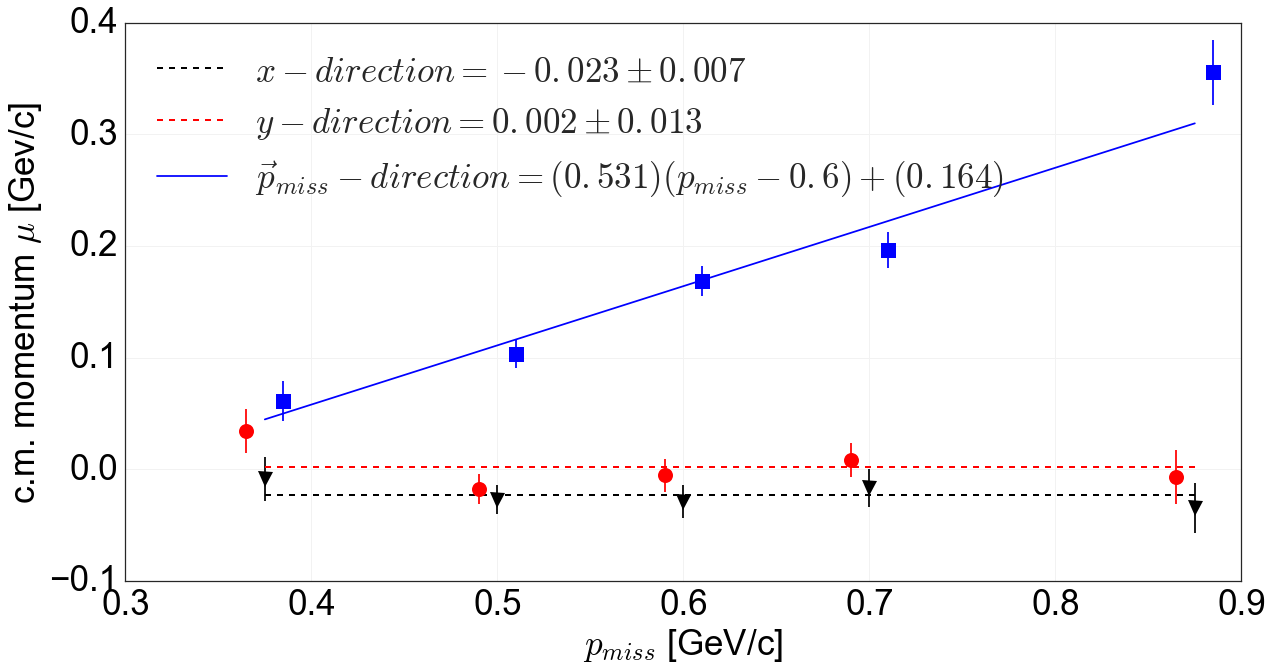

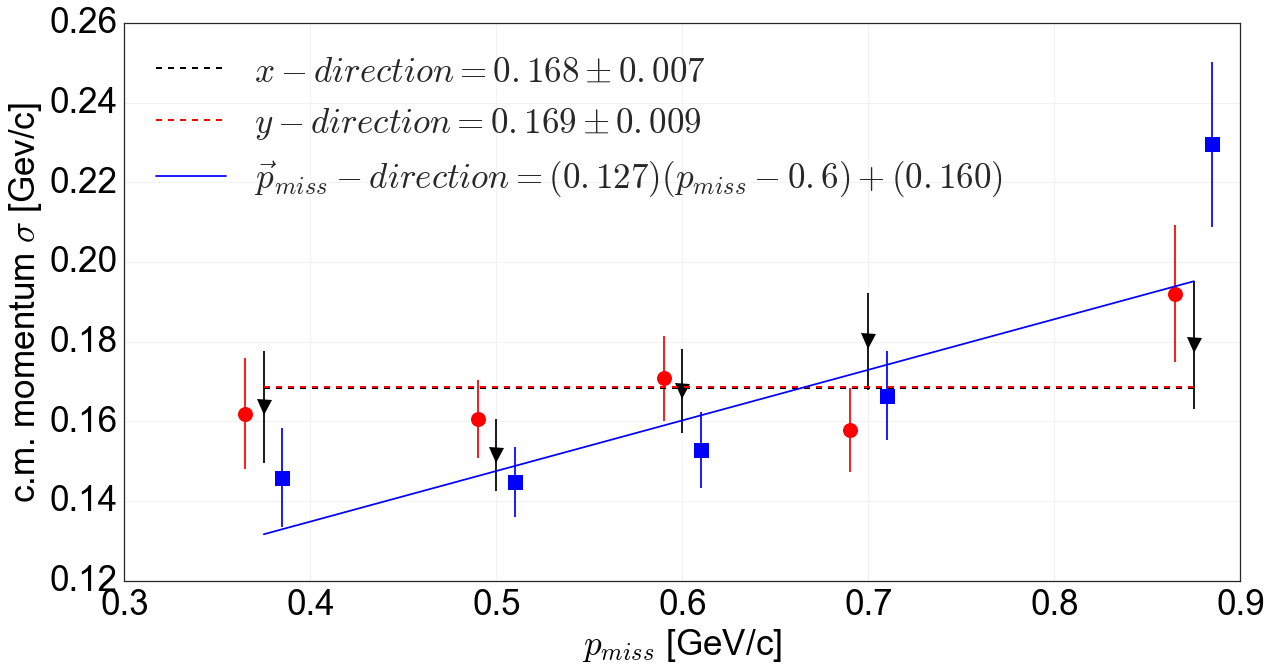

In [12]:
#with offset 0.6
columns = ['Q2','theta (miss-q)','Pmiss3Mag','pcmX','pcmY','pcmZ']

for target in ['C12']:#,'Al27','Fe56','Pb208']:
    data = read_root( path+"/AnaFiles/Ana_ppSRCcut_DATA_%s.root"%target, columns=columns )
    cm_parameters = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/%s_dataCMparameters.csv'%target)
    Pmiss = 0.5*(cm_parameters.pMiss_min + cm_parameters.pMiss_max)
    pmiss_bin_width = 0.5*(cm_parameters.pMiss_max - cm_parameters.pMiss_min)
    fit_par_plot( data=cm_parameters, target=target, var='mean', 
                 PmissOffset=0.6, title='$\\mu$', weight='unweighted',
                 do_plot_fit_pars=True , do_save_fit=True )
    fit_par_plot( data=cm_parameters, target=target, var='sigma', 
                 PmissOffset=0.6, title='$\\sigma$', weight='unweighted',
                 do_plot_fit_pars=True , do_save_fit=True ) 

const fit ($x-direction$) parameters:
[ 0.20241052] 
 covariance:
[[ 0.00023556]]
const fit ($y-direction$) parameters:
[ 0.17724382] 
 covariance:
[[ 0.00021358]]
linear fit ($\vec{p}_{miss}-direction$)
-----------
 parameters:
[ 0.07675372  0.19275892] 
 covariance:
[[ 0.0078999   0.00012787]
 [ 0.00012787  0.0001324 ]]
$\vec{p}_{miss}-direction$$=(0.077)(p_{miss}-0.6)+(0.193)$
a1: 0.0767537222195 +/- 0.08888138287
a2: 0.192758916031 +/- 0.0115063102921


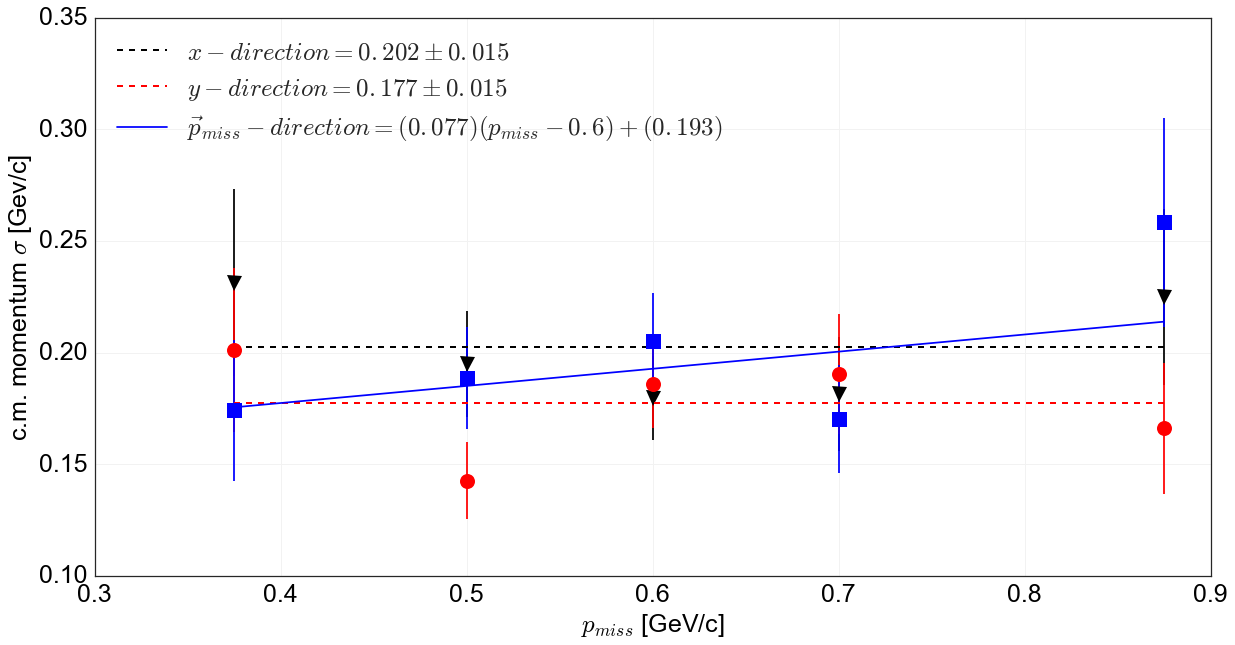

In [24]:
# sigma - with offset
fit_par_plot( data=cm_parameters, var='sigma', PmissOffset=0.6, title='$\\sigma$', weight='unweighted', do_plot_fit_pars=True ) 

const fit ($x-direction$) parameters:
[-0.01782276] 
 covariance:
[[  7.24364528e-05]]
const fit ($y-direction$) parameters:
[ 0.00157056] 
 covariance:
[[ 0.00012]]
linear fit ($\vec{p}_{miss}-direction$)
-----------
 parameters:
[ 0.56178162 -0.17762   ] 
 covariance:
[[ 0.00610774 -0.00340753]
 [-0.00340753  0.00198969]]


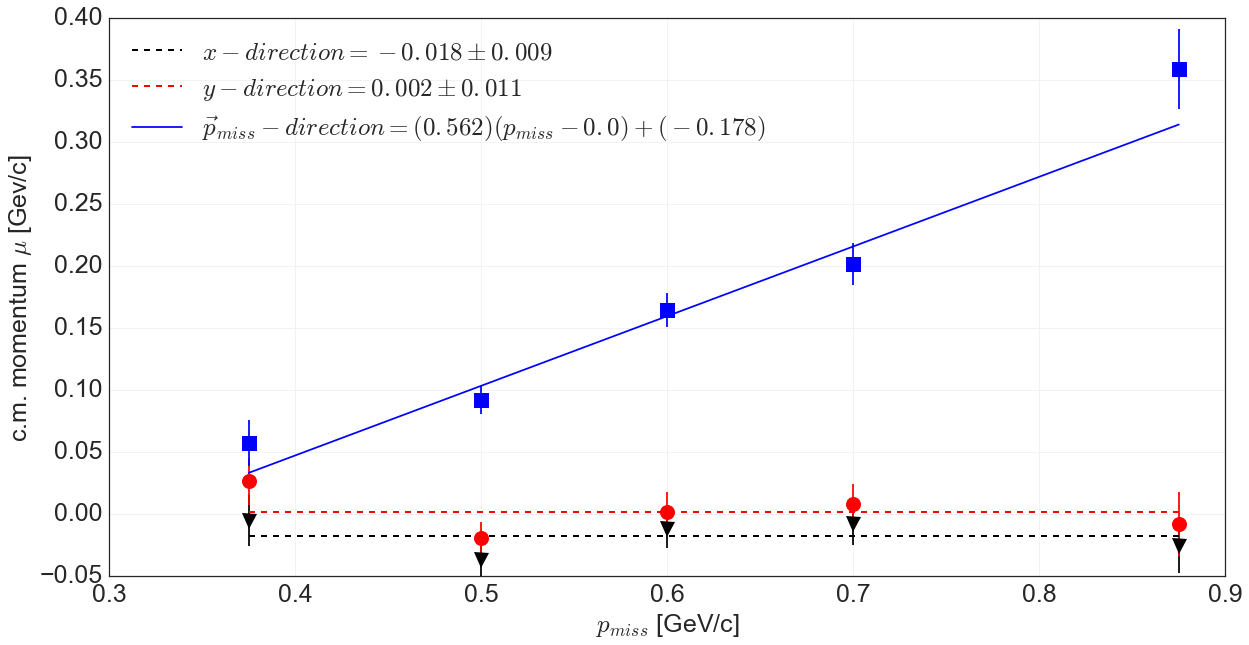

In [164]:
#no offset
fit_par_plot( data=cm_parameters,  var='mean', title='$\\mu$', weight='unweighted', do_plot_fit_pars=True )

const fit ($x-direction$) parameters:
[ 0.16528952] 
 covariance:
[[  4.96894342e-05]]
const fit ($y-direction$) parameters:
[ 0.16967154] 
 covariance:
[[ 0.00014423]]
linear fit ($\vec{p}_{miss}-direction$)
-----------
 parameters:
[ 0.14392575  0.0725059 ] 
 covariance:
[[ 0.00576415 -0.00321475]
 [-0.00321475  0.00187616]]


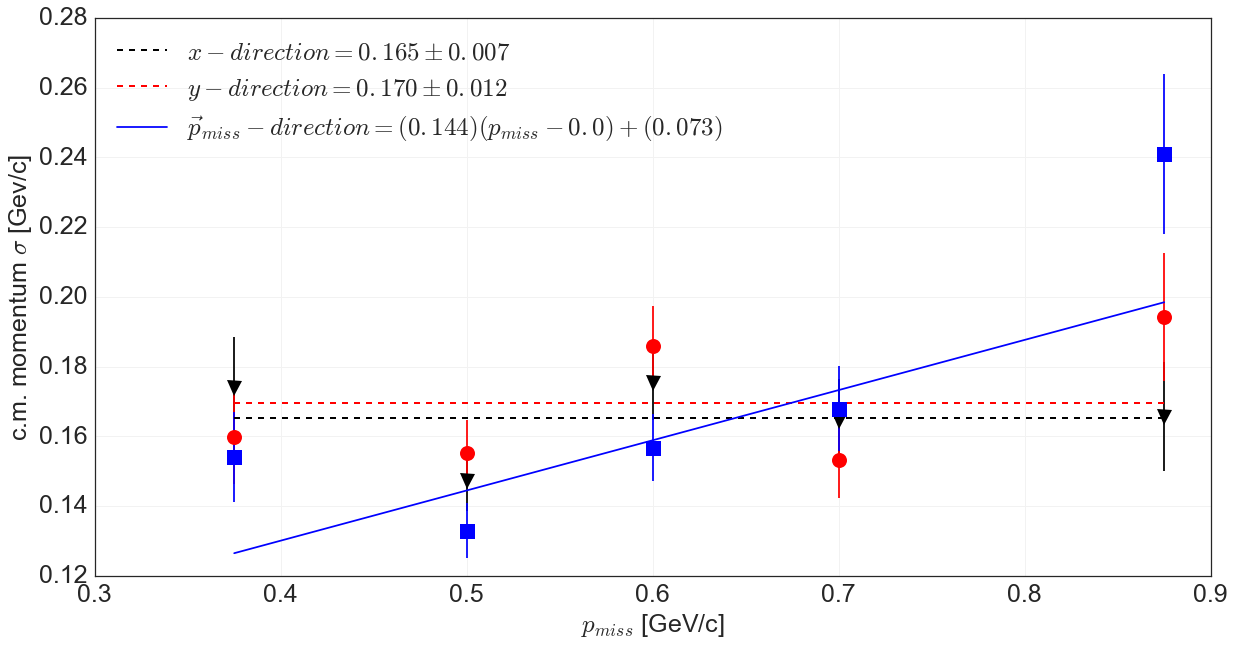

In [166]:
# sigma - no offset
fit_par_plot( data=cm_parameters, var='sigma', title='$\\sigma$', weight='unweighted', do_plot_fit_pars=True ) 